In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error # for calculating MSE
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

In [2]:
"""
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline
"""

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [3]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [4]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
print(X.shape, y.shape, y)
X.head()

(2130, 11) (2130,) [ 28.  28.  36. ... 171. 179. 172.]


,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0


### Data analysis

No: row number \
year: year of data in this row \
month: month of data in this row \
day: day of data in this row \
hour: hour of data in this row \
pm2.5: PM2.5 concentration (ug/m^3) \
DEWP: Dew Point (â„ƒ) \
TEMP: Temperature (â„ƒ) \
PRES: Pressure (hPa) \
Iws: Cumulated wind speed (m/s) \
Is: Cumulated hours of snow \
Ir: Cumulated hours of rain


DEWP露點 TEMP氣溫 PRES氣壓 Iws累積風速 Is累積時雪量 Ir累積時雨量


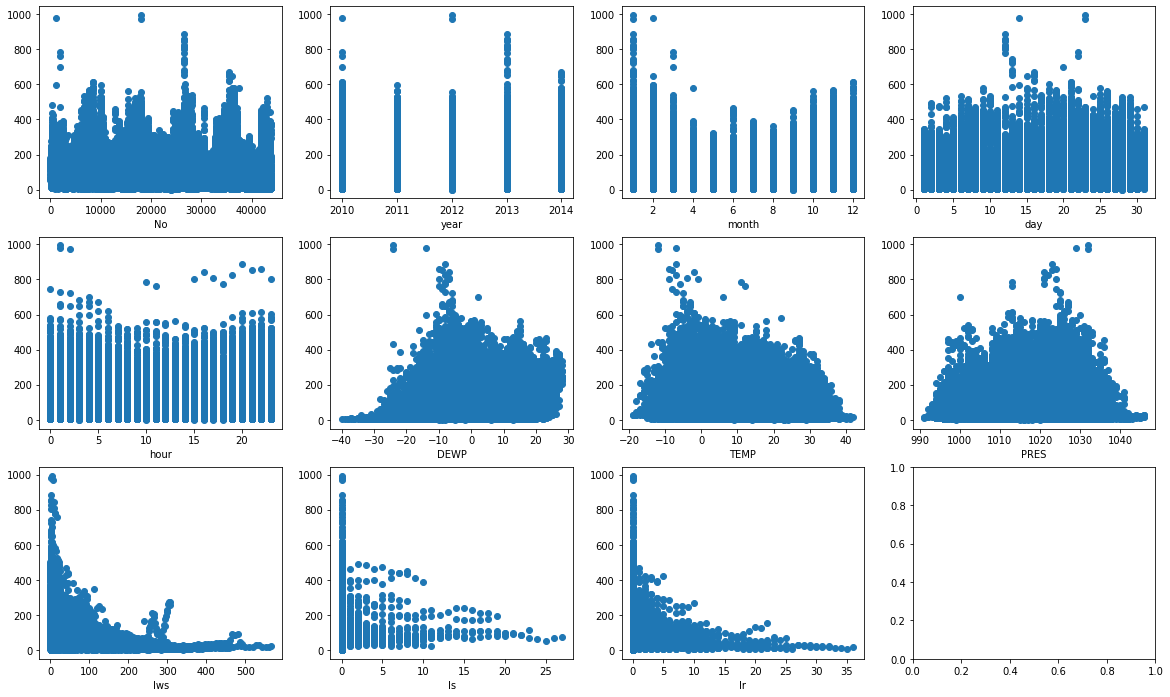

In [5]:
x_vars = [
    'No', 'year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is',
    'Ir'
]

_, subplot_arr = plt.subplots(3, 4, figsize=(20, 12))
for idx, x_var in enumerate(x_vars):
    x_idx = idx // 4
    y_idx = idx % 4
    subplot_arr[x_idx, y_idx].scatter(df[x_var], df['pm2.5'])
    subplot_arr[x_idx, y_idx].set_xlabel(x_var)
    
print('DEWP露點', 'TEMP氣溫', 'PRES氣壓', 'Iws累積風速', 'Is累積時雪量', 'Ir累積時雨量')
plt.show()

### Computing Feature Importance

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])

forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=200, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))


#Training data points: 1491
#Testing data points: 639
 1) DEWP                           0.172499
 2) No                             0.162135
 3) Iws                            0.153576
 4) hour                           0.122226
 5) day                            0.118751
 6) PRES                           0.115857
 7) TEMP                           0.111918
 8) month                          0.029709
 9) year                           0.011594
10) Is                             0.001615
11) Ir                             0.000121


### Feature selection

In [67]:
# keep the feature which important value > 0.1
Z = X[['DEWP' , 'No' , 'Iws' , 'hour' , 'day' , 'PRES', 'TEMP']].values

X_train, X_test, y_train, y_test = train_test_split(
    Z, y, test_size=0.3, random_state=0)
print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])
display("train/test shape", X_train.shape, X_test.shape)



#Training data points: 1491
#Testing data points: 639


'train/test shape'

(1491, 7)

(639, 7)

### create Linear regression model

In [68]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
display("train / test shape", X_train_std.shape, X_test_std.shape)

lr = LinearRegression()
#lr.fit(X_train_std, y_train)

'train / test shape'

(1491, 7)

(639, 7)

### Polynomial regression

In [74]:
poly = PolynomialFeatures(degree=4) # degree from 1 to 4, and 5 will let R^2 be negative

X_poly_train = poly.fit_transform(X_train_std)
X_poly_test = poly.fit_transform(X_test_std)

display(X_poly_train.shape, X_poly_test.shape)
display('#Features: %d' % X_poly_train.shape[1]) # if degree=2, then (1, a, b, a^2, ab, b^2)

regressor = lr.fit(X_poly_train, y_train)
y_train_pred = regressor.predict(X_poly_train)
y_test_pred = regressor.predict(X_poly_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))

print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

(1491, 330)

(639, 330)

'#Features: 330'

MSE train: 2468.62, test: 4104.57
R^2 train: 0.84, test: 0.74


### show a residual plot for Polynomial regressor on both training data and testing data

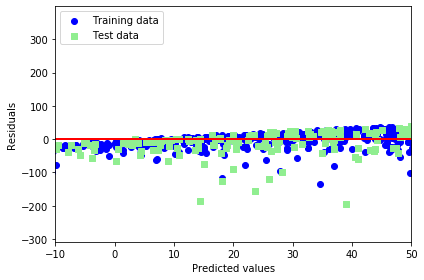

In [75]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

### Random Forest Regression

In [80]:
forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
print('#Features: %d' % X_poly_train.shape[1])

forest.fit(X_train, y_train)
forest_y_train_pred = forest.predict(X_train)
forest_y_test_pred = forest.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, forest_y_train_pred),
       mean_squared_error(y_test, forest_y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, forest_y_train_pred),
                                       r2_score(y_test, forest_y_test_pred)))

#Features: 330
MSE train: 201.99, test: 1487.89
R^2 train: 0.99, test: 0.90


### show a residual plot for Random Forest Regressor on both training data and testing data

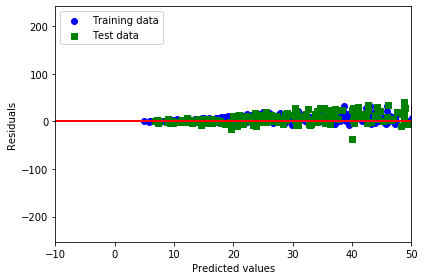

In [86]:
plt.scatter(
    forest_y_train_pred,
    forest_y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    forest_y_test_pred, forest_y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()